# Lucrative Learners

This case study aims at enhancing the lead conversion rate for X Education, an online education company that sells professional courses to industry experts. The project focuses on identifying the most promising leads, also known as "Hot Leads," to increase the efficiency of the company's sales and marketing efforts.

To achieve this goal, the project will:

1. Develop a logistic regression model that assigns a lead score between 0 and 100 to each lead. A higher score indicates a hot lead with a high likelihood of converting, while a lower score signifies a cold lead with a low probability of conversion.
2. Ensure that the model can adapt to new requirements or changes in the company's lead evaluation strategy as specified in a separate document.
3. Provide recommendations for implementation

## About the dataset

1. `Leads.csv`: The dataset is a CSV file with around 9000 data points. It consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. The target variable is the column ‘Converted’ which tells whether a past lead was converted or not wherein `1` means it was converted and `0` means it wasn’t converted
2. 'Leads Data Dictionary.xlsx': is a data dictionary which describes the meaning of the variables.

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
#Import the required Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
import ipywidgets as widgets

pd.set_option('display.max_columns', 122)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [169]:
# Importing all datasets
leads_data = pd.read_csv("data/Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [66]:
leads_data.shape

(9240, 37)

## Data quality and cleaning

In [7]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
# Check for any duplicate values
leads_data.duplicated().sum()

0

In [33]:
#Find the no. of unique values in every column
leads_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

**Observation**: Some of the columns have just 1 unique value. So their presence or absence is not going to be a factor in our analysis.

### Handle columns that have only unique values

We can remove the columns `Prospect ID` and `Lead Number` as they have no use in our analysis

In [170]:
# Lead Number Dropping and Prospect ID since they have all unique values

leads_data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

### Handle columns that have just 1 value

`Magazine`, `Newspaper Article`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`

In [172]:
print(leads_data.Magazine.value_counts())
print(leads_data['Newspaper Article'].value_counts())
print(leads_data['Receive More Updates About Our Courses'].value_counts())
print(leads_data['Update me on Supply Chain Content'].value_counts())
print(leads_data['Get updates on DM Content'].value_counts())
print(leads_data['I agree to pay the amount through cheque'].value_counts())

No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64


In [173]:
# Since all these columns have just 1 unique value, they are not going to impact our analysis. Thus, we can drop them.

columns_with_single_value = ['Magazine', 'Newspaper Article', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

leads_data.drop(columns_with_single_value, axis=1, inplace=True)

print('Shape after dropping', leads_data.shape)

Shape after dropping (9240, 29)


### Analyze columns with missing values

In [174]:
leads_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [175]:
# What is the percentage of missing values
round(leads_data.isnull().mean() * 100, 2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Lead Origi

#### Replace all values labelled "select" with NA values, and re-check null value count

We've been told that several of the categorical variables have a value 'Select'. That means that they were probably in a form or survey and were not filled.

So they can be considered as null values.

In [176]:
leads_data = leads_data.replace('Select', np.nan)
round(leads_data.isnull().mean() * 100, 2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Lead Origi

**Observation**: There are a lot of categorical variables with lots of missing values. Let's look at the columns individually to see what's the best way to handle them:

### Drop columns with high percentages of null values

- `Lead Quality`
- `Asymmetrique Profile Score`
- `Asymmetrique Activity Score`
- `Asymmetrique Activity Index`
- `Asymmetrique Profile Index`

In [177]:
columns_to_drop = ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']
leads_data.drop(columns_to_drop, axis=1, inplace = True)
print('Data after dropping:', leads_data.shape)

Data after dropping: (9240, 22)


### Understand the significance of other columns and handle them

#### Tags

In [178]:
leads_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

**Observation**: Judging by the fact that this column also contains a high number of missing values, and the info is something that won't be readily available while contacting a lead initially, we could consider dropping them.

In [179]:
leads_data.drop(['Tags'], axis=1, inplace = True)

#### What matters most to you in choosing a course

In [180]:
leads_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

**Observation:** 99% of data just has one label, so we can drop this column.

In [181]:
leads_data.drop(['What matters most to you in choosing a course'], axis=1, inplace = True)
leads_data.shape

(9240, 20)

#### City and country

In [182]:
print(leads_data['Country'].value_counts(normalize=True))

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [183]:
print(leads_data['City'].value_counts(normalize=True))

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64


**Observations**:
    
- Most of the country info is just either India, or is simply not available.
- With city too, most of the city values are either Mumbai or not available.

Moreover, given that this is online education, the location would have little bearing on the lead generation. So we can just drop this column as it may not be useful for our model building. 

In [184]:
leads_data.drop(['Country'], axis=1, inplace = True)
leads_data.drop(['City'], axis=1, inplace = True)

#### Search, Newspaper, Digital Advertisement, X Education Forums

In [185]:
leads_data['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [186]:
leads_data['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [187]:
leads_data['Newspaper'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [188]:
leads_data['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [189]:
leads_data['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

**Observation**: The values are highly imbalanced, so we'll drop all the above columns

In [190]:
leads_data.drop(['Search', 'Through Recommendations', 'Newspaper', 'Digital Advertisement', 'X Education Forums'], axis=1, inplace = True)

#### Fill NA values for other categorical columns

In [191]:
leads_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [193]:
leads_data['Specialization'] = leads_data['Specialization'].fillna('NA')
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].fillna('NA')
leads_data['Last Activity'] = leads_data['Last Activity'].fillna('NA')
leads_data['Lead Source'] = leads_data['Last Activity'].fillna('NA')

# re-check null values again
round(leads_data.isnull().mean() * 100, 2).sort_values(ascending = False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

**Observation:** Since the number of null records are fairly small, it will be easier if we just dropped them

In [194]:
leads_data = leads_data[~leads_data['TotalVisits'].isnull()]
leads_data = leads_data[~leads_data['Page Views Per Visit'].isnull()]

In [195]:
print(leads_data.isnull().sum())
print(leads_data.shape)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64
(9103, 13)


### Check for outliers in numerical columns

`TotalVisits`, `Total Time Spent on Website`, `Page Views Per Visit` 

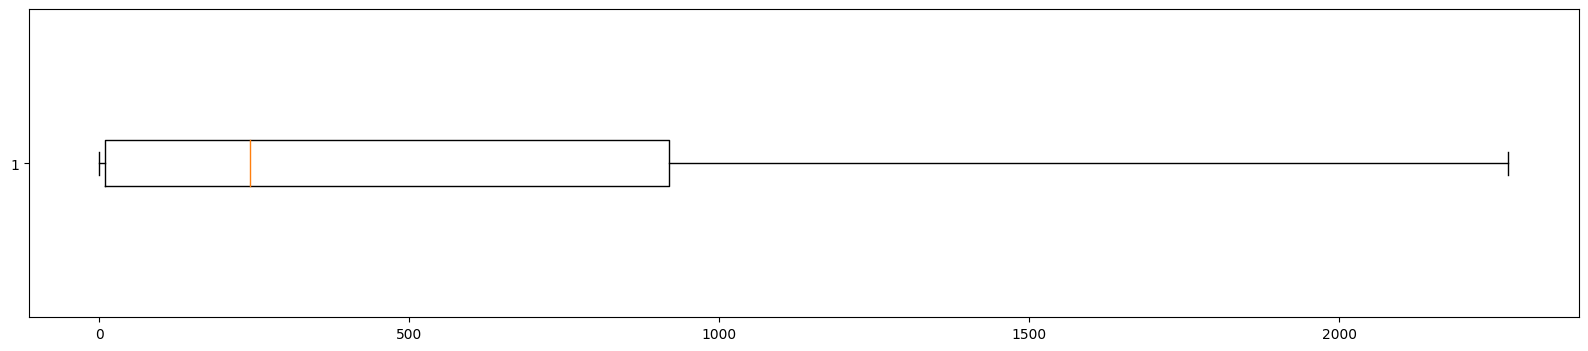

In [196]:
plt.figure(figsize=[20,4])
plt.boxplot(leads_data['Total Time Spent on Website'], vert=False)
plt.show()

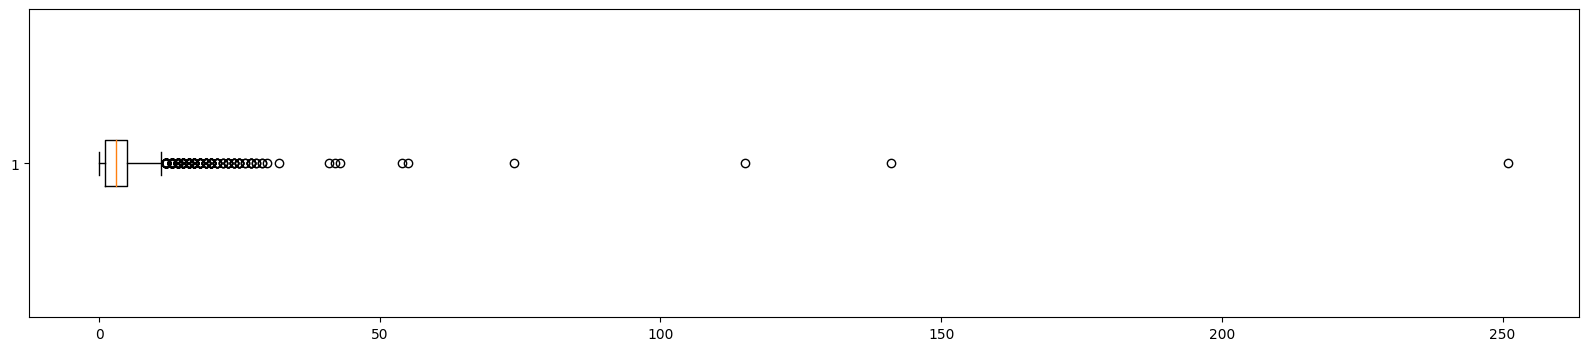

In [197]:
plt.figure(figsize=[20,4])
plt.boxplot(leads_data['TotalVisits'], vert=False)
plt.show()

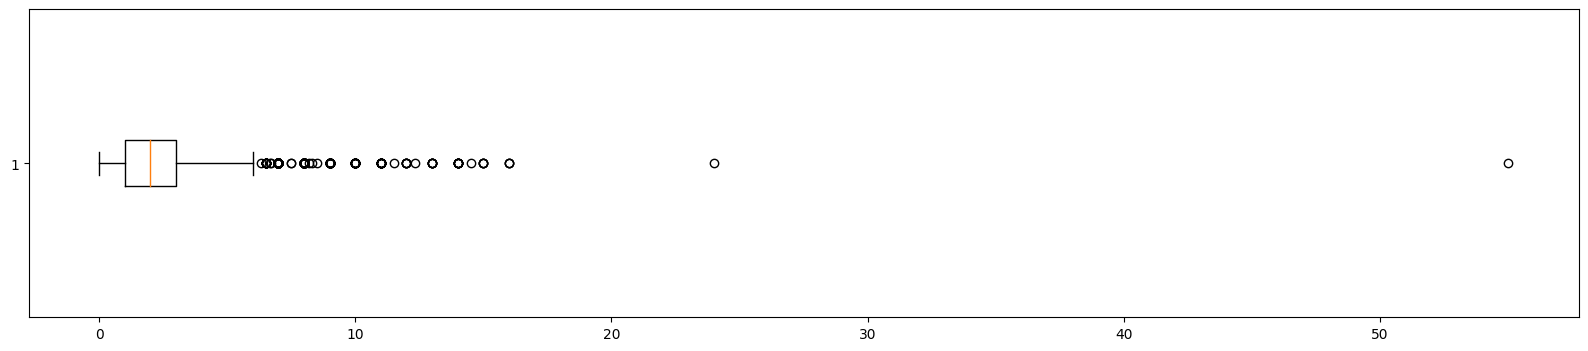

In [198]:
plt.figure(figsize=[20,4])
plt.boxplot(leads_data['Page Views Per Visit'], vert=False)
plt.show()

**Observation:**

There are some outliers for the columns `TotalVisits` and `Page Views Per Visit`. We'll analyze later how best to handle them.

### Convert binary variables into 0 / 1

In [199]:
# List of variables to map

binary_columns =  ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[binary_columns] = leads_data[binary_columns].apply(binary_map)

## Lead demographics

### Lead origin

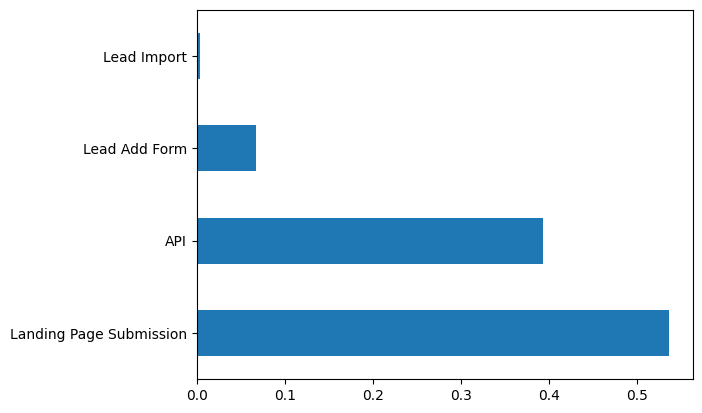

In [200]:
leads_data['Lead Origin'].value_counts(normalize=True).plot.barh()
plt.show()

**Insight**: Most leads originate from the submission on the landing page

### Lead sources

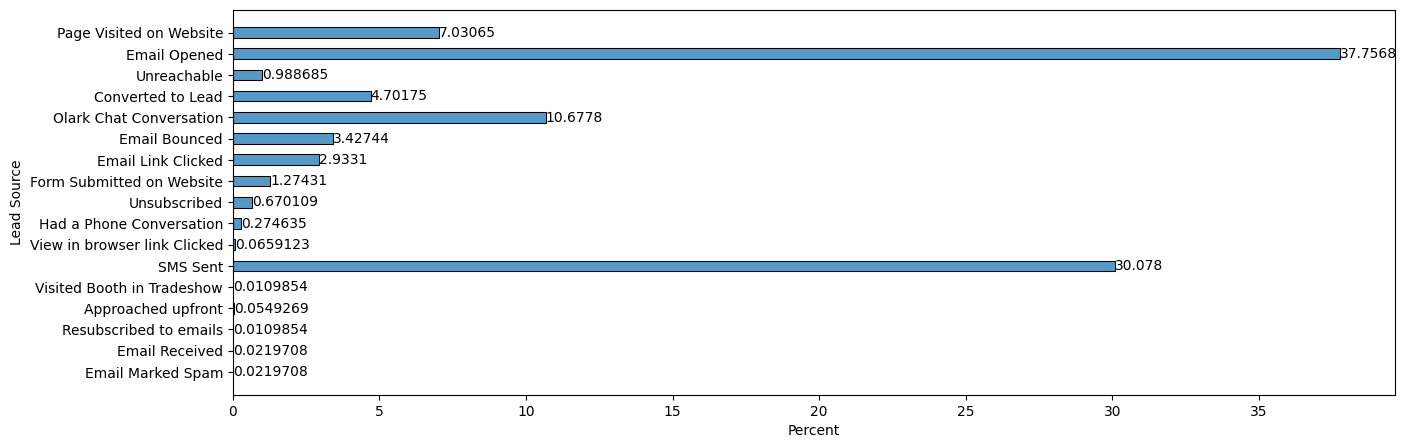

In [201]:
plt.figure(figsize=[15,5])
ax = sns.histplot(y='Lead Source', data=leads_data, stat="percent", shrink=0.5)
ax.bar_label(ax.containers[1])
plt.show()

**Insight:**: SMSes and emails are the most used channels for sourcing leads

### Email and call preferences

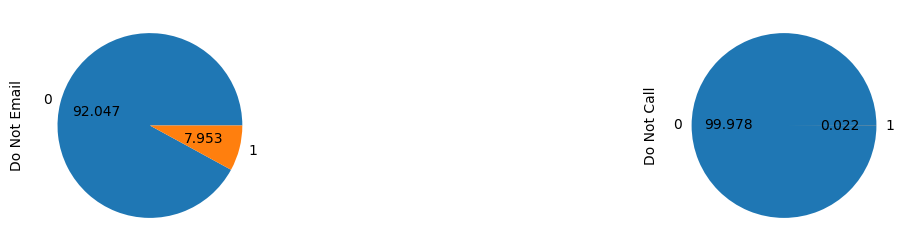

In [202]:
plt.figure(figsize=[15,3])

plt.subplot(1,2,1)
leads_data['Do Not Email'].value_counts(normalize=True).plot.pie(autopct='%.3f')

plt.subplot(1,2,2)
leads_data['Do Not Call'].value_counts(normalize=True).plot.pie(autopct='%.3f')

plt.show()

**Insight**:
    
Most people are okay with getting emails and phone calls.

## Observing correlations between features

### Email and call preferences vs Conversions

In [203]:
leads_data.Converted.value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

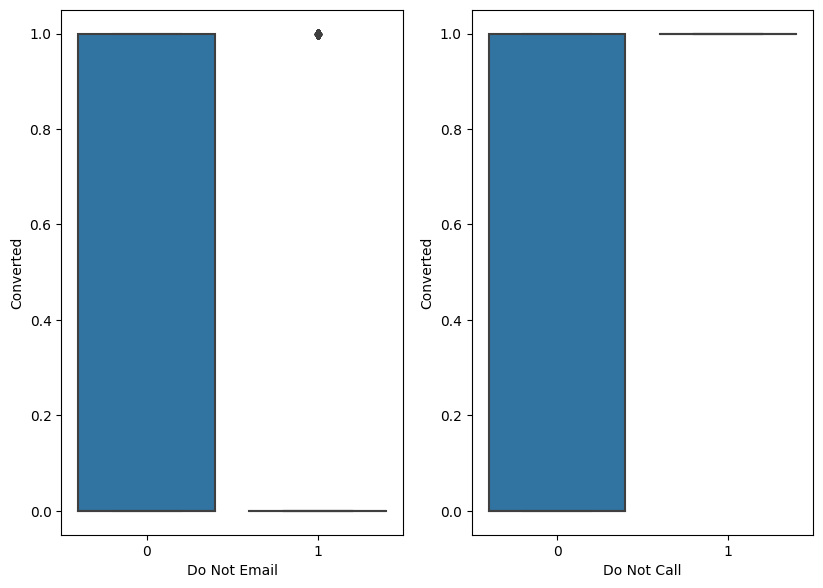

In [204]:
plt.figure(figsize=[15,15])

plt.subplot(2,3,1)
sns.boxplot(x = 'Do Not Email', y = 'Converted', data = leads_data)

plt.subplot(2,3,2)
sns.boxplot(x = 'Do Not Call', y = 'Converted', data = leads_data)

plt.show()

**Insight**: Most people who prefer getting emails or calls are successfully converted

### Total Visits vs Conversions

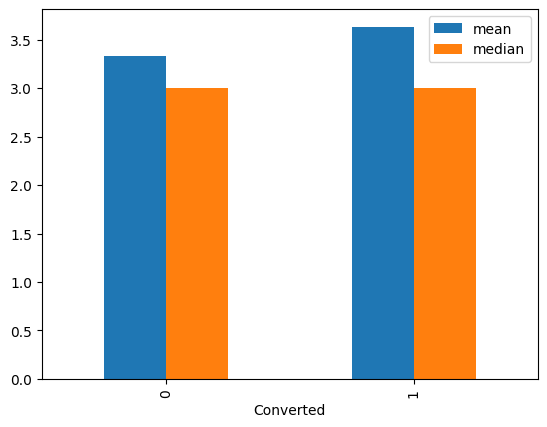

In [205]:
leads_data.groupby("Converted")["TotalVisits"].aggregate(["mean", "median"]).plot.bar()
plt.show()

**Insight**: Total visits don't play any significant role in conversions. We need not use them for our model so there won't be any need to handle the outliers.

### Total Time Spent on Website vs Conversion rate

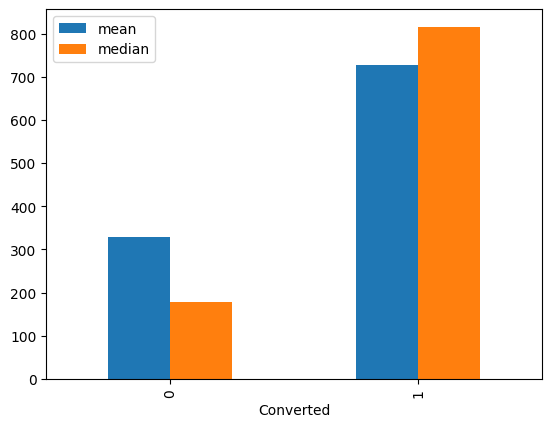

In [206]:
leads_data.groupby("Converted")["Total Time Spent on Website"].aggregate(["mean", "median"]).plot.bar()
plt.show()

**Insight**

Clearly, more time spent on the website is correlated with a higher number of conversions.

### Page Views Per Visit vs Conversions

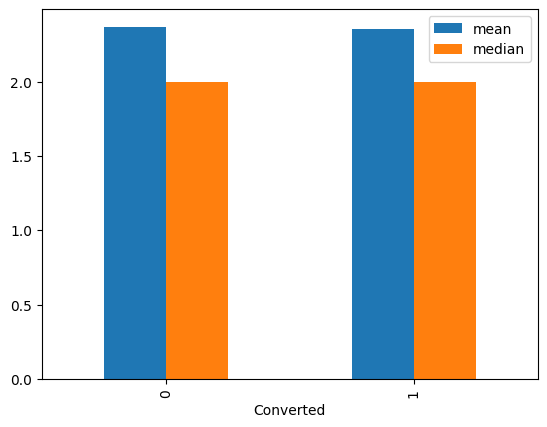

In [207]:
leads_data.groupby("Converted")["Page Views Per Visit"].aggregate(["mean", "median"]).plot.bar()
plt.show()

**Insight:** Page views per visit also have negligible impact on lead conversions. We need not use them for our model so there won't be any need to handle the outliers.

### Lead Origin vs Conversion

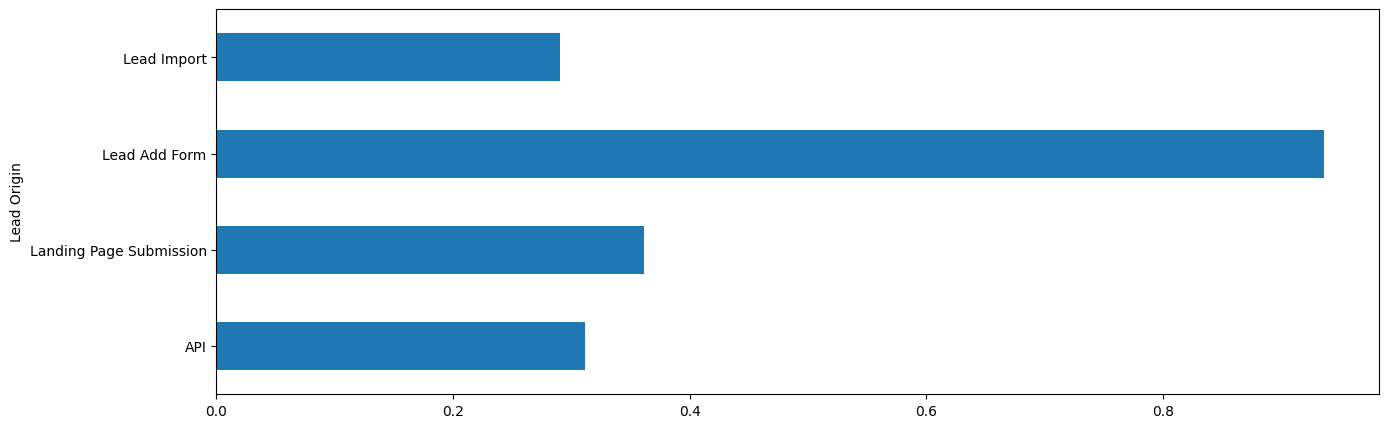

In [208]:
plt.figure(figsize=[15,5])
leads_data.groupby("Lead Origin")["Converted"].mean().plot.barh()
plt.show()

### Lead Sources vs Conversions

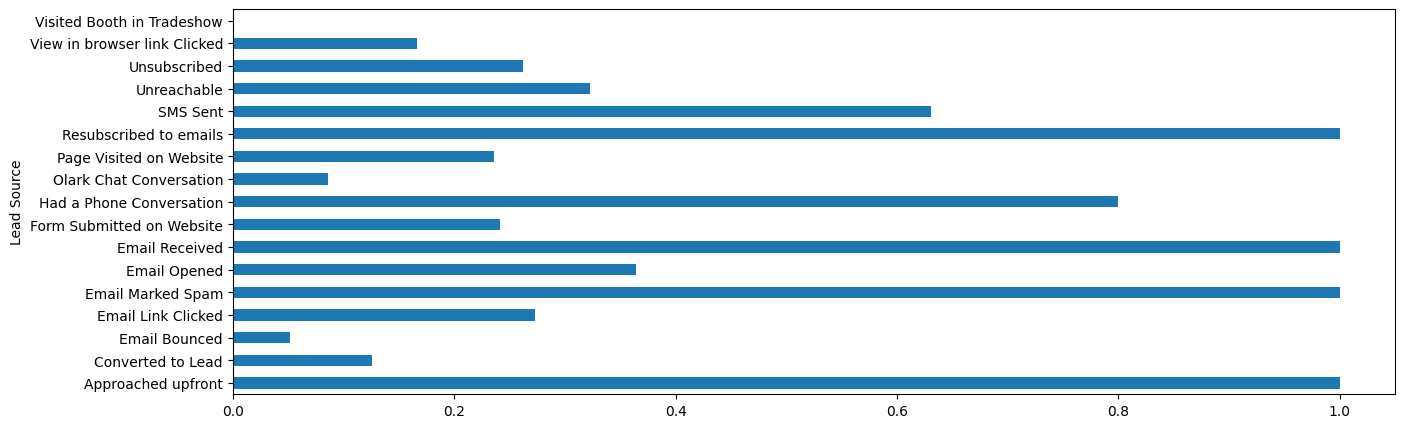

In [209]:
plt.figure(figsize=[15,5])
leads_data.groupby("Lead Source")["Converted"].mean().plot.barh()
plt.show()

**Insight**:

Leads who have received, resubscribed to emails or approached upfront are most likely to convert.

Olark Chat conversation, bounced emails are least like to become successful conversions

## Data preparation

### Convert columns to categorical

For all the categorical columns, we need to create dummy variables

### Select candidate columns, and drop the unnecessary ones

### Split the dataset into training and testing sets

### Data rescaling

### Model building